Quin Daly, 
Math 436 Homework 10.5

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as animation
from IPython.display import HTML

In [3]:
%matplotlib inline

Exercise 6.15

In [99]:
def advec_diffuse(a,dt,T,x=[],u0=[]):
    """Uses a spectral decomposition and forward Euler to solve 
    the 1D advection diffusion equation u_t + au_x = u_xx.
    Assumes the domain is [0,2pi] or else the wavenumbers would need
    to be weighted differently.
    a is the advection speed
    dt is the time-step
    T is the final time we run to
    x is the spatial discretization
    u0 is the initial condition
    
    Because this uses the fft, it is best to have len(x) = 2^K for some integer K"""

    N = len(x)
    #The most difficult part is figuring out how numpy indexes the wavenumbers
    k = np.array([1j*y for y in range(0,int(N/2))] + [0] + [1j*y for y in range(int(-N/2)+1,0)])
    k2 = k**2; #k is actually ik
    u = []
    u.append(u0)
    uhat = np.fft.fft(u0)
    totalStep = int(T/dt)
    for nn in range(totalStep):
        # Trapezoid time-stepping
        uhat2 = (uhat+(dt/2)*(-a*k + k2)*uhat) / (1-(dt/2)*(-a*k + k2))
        new_uhat = uhat + (dt/2)*(-a*k + k2)*uhat + (dt/2)*uhat2
        uhat = new_uhat.copy()
        # revert back to real values (not necessary unless we want
        # to save our solution in real space)
        u.append(np.real(np.fft.ifft(uhat)))
    return x,u

In [100]:
x=np.linspace(0,2*np.pi,128)
u0 = np.sin(x**2) + np.cos(5*x)
T = 1
a = 4
x,u = advec_diffuse(a,.001,T,x=x,u0=u0)

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,2*np.pi))
ax.set_ylim((-1,1))
#ax.set_ylim((-100000,100000))
sol, = plt.plot([],[])

def update(i):
    sol.set_data(x,u[i])
    return sol

ani = animation.FuncAnimation(fig, update, frames=range(300), interval=50)
plt.close()
HTML(ani.to_html5_video())

Exercise 10.16

In [123]:
def diffusive_burgers(dt,T,x=[],u0=[]):
    """Uses a spectral decomposition and forward Euler to solve 
    the 1D advection diffusion equation u_t + au_x = u_xx.
    Assumes the domain is [0,2pi] or else the wavenumbers would need
    to be weighted differently.
    a is the advection speed
    dt is the time-step
    T is the final time we run to
    x is the spatial discretization
    u0 is the initial condition
    
    Because this uses the fft, it is best to have len(x) = 2^K for some integer K"""

    N = len(x)
    #The most difficult part is figuring out how numpy indexes the wavenumbers
    k = np.array([1j*y for y in range(0,int(N/2))] + [0] + [1j*y for y in range(int(-N/2)+1,0)])
    k2 = k**2;
    u = []
    u.append(u0)
    uhat = np.fft.fft(u0)
    totalStep = int(T/dt)
    for nn in range(totalStep):
        # forward Euler time-stepping
        new_uhat = uhat + dt*(-np.fft.fft(np.fft.ifft(k*uhat)*np.fft.ifft(uhat)) + k2*uhat + k2**2*uhat)
        uhat = new_uhat.copy()
        # revert back to real values (not necessary unless we want
        # to save our solution in real space)
        u.append(np.real(np.fft.ifft(uhat)))
    return x,u

In [124]:
x=np.linspace(0,2*np.pi,128)
u0 = np.sin(x)*np.cos(x**2)+0.5*np.sin(14*x)
x,u = diffusive_burgers(.001,100,x=x,u0=u0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


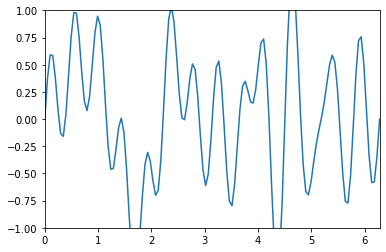

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,2*np.pi))
ax.set_ylim((-1,1))
#ax.set_ylim((-100000,100000))
sol, = plt.plot([],[])

def update(i):
    sol.set_data(x,u[i])
    return sol

ani = animation.FuncAnimation(fig, update, frames=range(100), interval=20)
HTML(ani.to_html5_video())